Il codice nella cella seguente **deve essere eseguito**, ma **non deve essere modificato**, perché essenziale per un'esecuzione senza errori del successivo codice del laboratorio. Dopo averlo eseguito, attendi che il pallino adiacente ad R in alto a destra diventi bianco o che scompaia il simbolo [*].

In [1]:
#Esegui ma non modificare. Attendi  che scompaia il simbolo [*] 
#o che il pallino adiacente ad R in alto a destra diventi bianco
#potrebbe essere necessario qualche minuto
source('lib1/preamble.R')

# Analisi dei gruppi (clustering): Clustering K-means

È il metodo più semplice per creare una partizione delle $n$ osservazioni in un numero **pre-specificato** $K$ di cluster,  dove $K$ è **pre-specificato** in partenza e non è oggetto di ottimizzazione. 

Nel clustering K-means il grado di dissimilarità tra le osservazioni all'interno di un cluster $C_k$ viene chiamato  **variabilità interna** o *funzione di costo* del  cluster $C_k$ e denotata con $W(C_k)$.  
L'obiettivo diventa quindi la ricerca di $K$ cluster ${C_1,C_2,\dots,C_k,\dots,C_K}$ che minimizzino la *funzione obiettivo* ottenuta come somma delle funzioni di costo su tutti i cluster, ossia $\sum_{k=1}^K W(C_k)$.

La scelta più comune per $W(C_k)$ è il rapporto tra la somma delle *distanze* al quadrato fra tutte le coppie di osservazioni nello stesso gruppo $C_k$ e il numero di osservazioni all'interno del cluster. 


Vorrei mostrarti come può essere schematizzato, in linea di principio, l'algoritmo per la determinazione dei gruppi mediante clustering $K$-means, prima di passare, come al solito, all'implementazione pratica in R/RStudio!

## Algoritmo $K$-means

Il problema di ottimizzazione è di tipo discreto ed ammette un numero di soluzioni pari a $K^n$. Pertanto, se $n$ è grande, non è facile ricercare la soluzione ottima globale in un tempo ragionevole.
L'algoritmo che ti sto per illustrare è quindi un procedimento euristico che mira alla determinazione di una soluzione subottima (ottimo *locale* non *globale*), che, tuttavia, nella maggior parte dei casi, risulta soddisfacente.

L'algoritmo per il clustering $K$-means può essere delineato come segue.


* passo 1. Assegna, ad ognuna delle $n$ osservazioni, uno dei $K$ cluster **a caso**. La partizione così ottenuta rappresenta la soluzione iniziale, necessaria a far partire l'algoritmo. La soluzione finale dipenderà da questa soluzione iniziale.

* passo 2. Calcola,  per ognuno del $K$ cluster iniziali, il vettore delle medie di tutte le variabili/colonne, calcolato considerando le sole osservazioni assegnate a ciascun cluster al passo 1. 
Il vettore delle medie di ogni cluster viene chiamato *centroide* e denotato con $\bar{\bf{x}}_k$, $k=1,\ldots,K$.


* passo 3. Ripeti l'assegnazione delle $n$ osservazioni ai $K$ cluster.
 + calcola, per ogni osservazione, la sua distanza dai $K$ centroidi calcolati al passo precedente.
 + assegna, ad ogni osservazione, il cluster del centroide  più vicino
 + aggiorna il valore della funzione obiettivo 
 + se il valore della funzione obiettivo resta invariato, termina l'algoritmo; altrimenti vai al passo 4.
 
* passo 4. Ricalcola i centroidi dei cluster ottenuti al passo precedente e ripeti il passo 3.


Alla fine, l'algoritmo restituirà un raggruppamento delle osservazioni iniziali (o meglio degli indici di riga) nei cluster ${C_1,\dots,C_K}$, che soddisfano le proprietà P1. e P2., ed il valore della funzione obiettivo corrisponedente $\sum_{k=1}^K W(C_k)$.

Si può dimostrare che l'algoritmo appena delineato garantisce che, ad ogni iterazione, la funzione obiettivo non aumenti, e ciò assicura che l'algoritmo converga.

Come ti ho già anticipato, la soluzione finale dipende dai cluster generati al passo 1. 
Per migliorare la soluzione ottenuta, puoi pensare di applicare l'algoritmo più volte, generando diverse soluzioni iniziali al passo 1. e scegliendo quella che ottiene il minimo valore della funzione obiettivo. Maggiore è il numero di volte che applicherai l'algoritmo, più la soluzione finale si avvicinerà all'ottimo globale, ma maggiore sarà l'onere computazionale.


### Implementazione algoritmo in R/RStudio

A partire dal data set bidimensionale ($p=2$) simulato contenuto in `df[,1:2]`, puoi effettuare un'analisi dei gruppi mediante la funzione `kmeans()`, che ha come argomenti `centers=` in cui specificare il numero $K$ di cluster e `nstart=`, in cui impostare il numero di soluzioni iniziali da generare (nell'esempio seguente ne usiamo 20). Come per la PCA, bisogna dichiarare una variabile che salvi l'output della funzione `kmeans()`, che nell'esempio seguente chiamiamo `km_out`.

In [2]:
km_out <- kmeans(df[,1:2], centers = 2, nstart = 20)

Osserva che la classe di `km_out` è di tipo `kmeans` (poco importa!)

In [3]:
class(km_out)

[1] "kmeans"

L'oggetto contiene i seguente campi

In [4]:
names(km_out)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

Cerchiamo di esplorare i più importanti. 

* Il primo `km_out$cluster` contiene il vettore delle etichette, che identificano il gruppo assegnato dall'algoritmo ad ogni osservazione. Salviamolo in memoria come una nuova colonna del data set (che chiamiamo `cluster_Kmeans`).

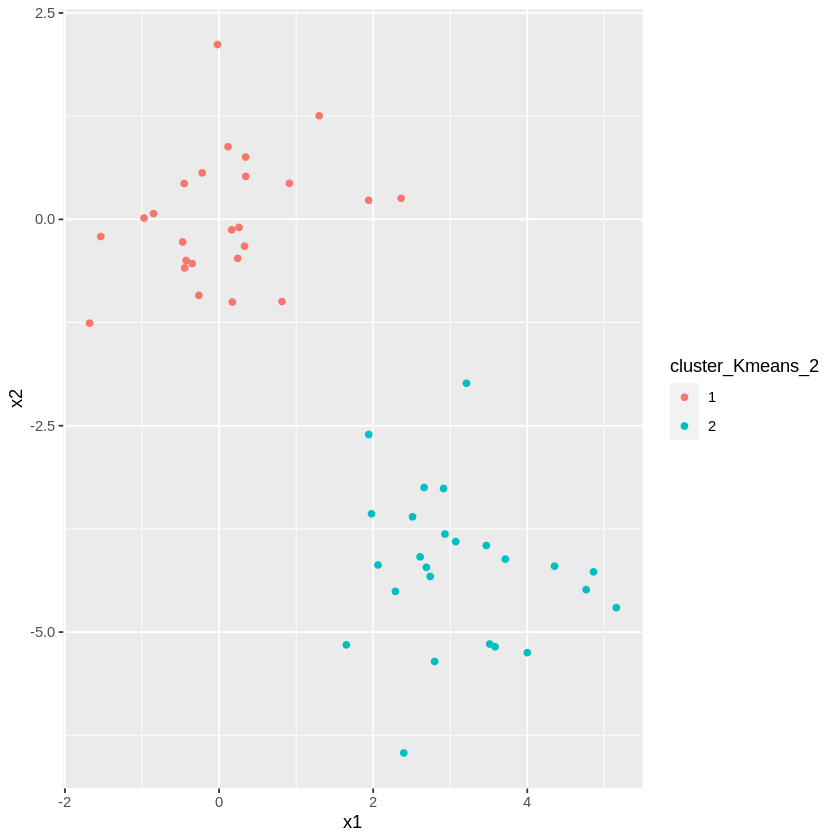

In [5]:
df <- df %>% 
  mutate(cluster_Kmeans_2 = factor(km_out$cluster)) #salviamo il vettore delle etichette che identificano i cluster

p <- ggplot(data = df) +
  geom_point(mapping = aes(x1, x2, colour = cluster_Kmeans_2)) #coloriamo i punti in base al vettore delle etichette
p

* Il secondo `km_out$centers` contiene le coordinate dei centroidi dei gruppi indentificati, che salviamo come `'data.frame'`. I centroidi sono rappresentati in rosso nel grafico seguente 

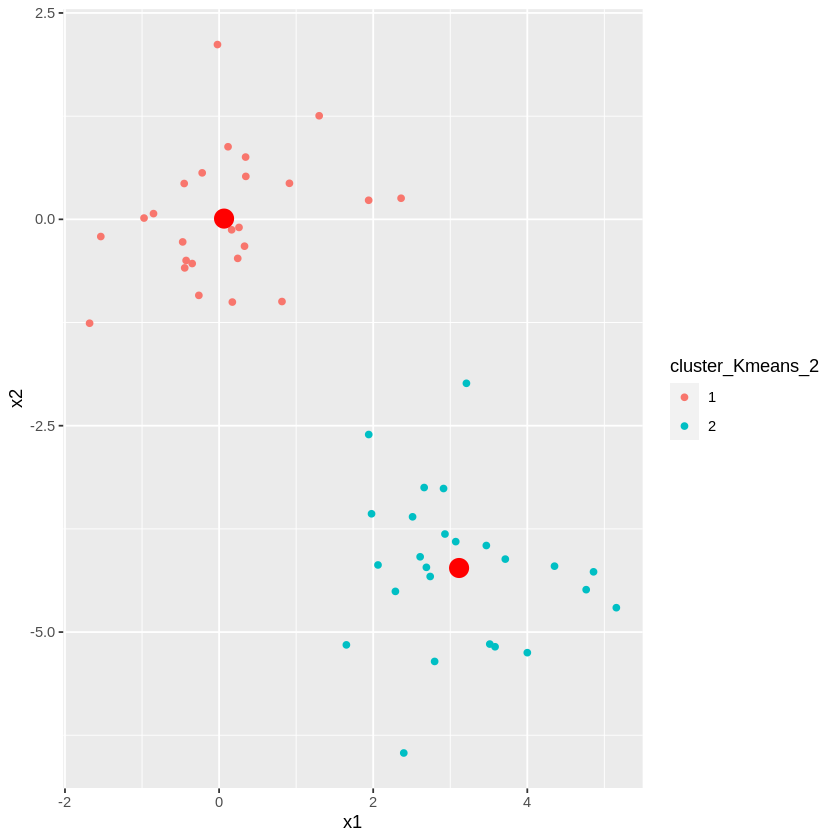

In [6]:
centers_Kmeans_2 <- as.data.frame(km_out$centers)

p + geom_point(data = centers_Kmeans_2, mapping = aes(x = x1, y = x2), size = 5, color = "red") 

* L'output `km_out$tot.withinss` è la somma di $W(C_k)$ per tutti i cluster, ossia il valore della funzione obiettivo.

In [7]:
km_out$tot.withinss

[1] 77.77091

Puoi vedere come per questo problema, piuttosto semplice, l'algoritmo $K$-means riesca a ricostruire perfettamente i cluster di partenza.
L'inversione dei colori ovviamente non ha alcuna importanza.

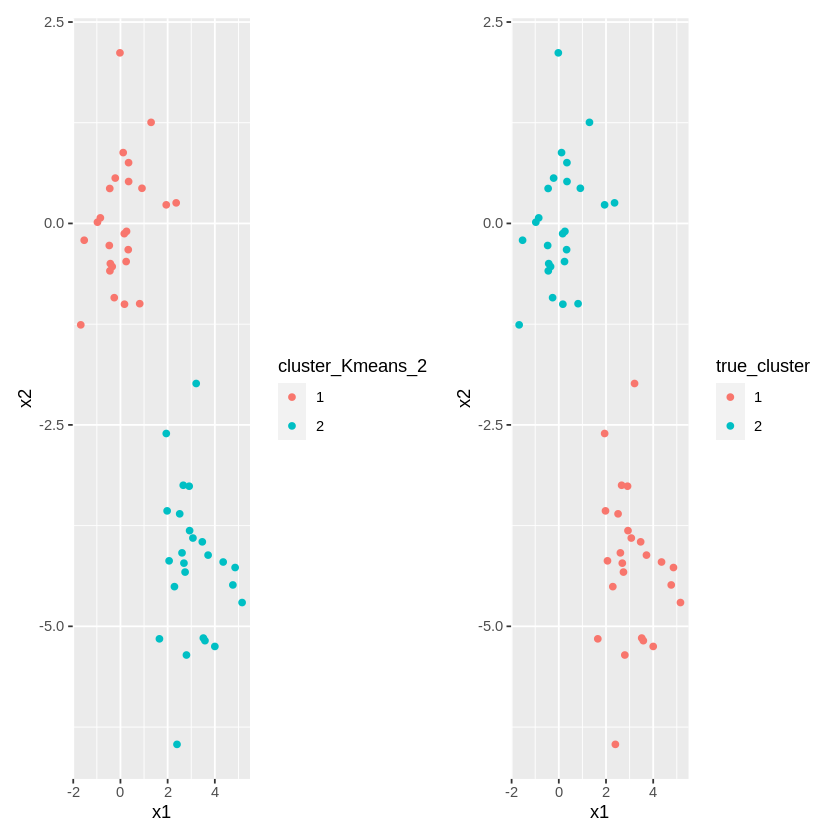

In [8]:
wrap_plots(p,true_cluster_plot)

### Scelta di $K$

È importante validare la soluzione ottenuta, ossia certificare quanto essa rappresenti una suddivisione delle osservazioni in gruppi con caratteristiche davvero diverse e interpretabili. Se hai scelto un $K$ troppo elevato, potresti aver suddiviso le osservazioni  in troppi cluster e aver operato un raggruppamento basato su una variazione fisiologica (*noise*) dei diversi individui/osservazioni/righe.

Di seguito ti mostro, a titolo di esempio, il clustering ottenuto applicando l'algoritmo $K$-means al data set simulato in precedenza scegliendo $K=3$, anziché 2.

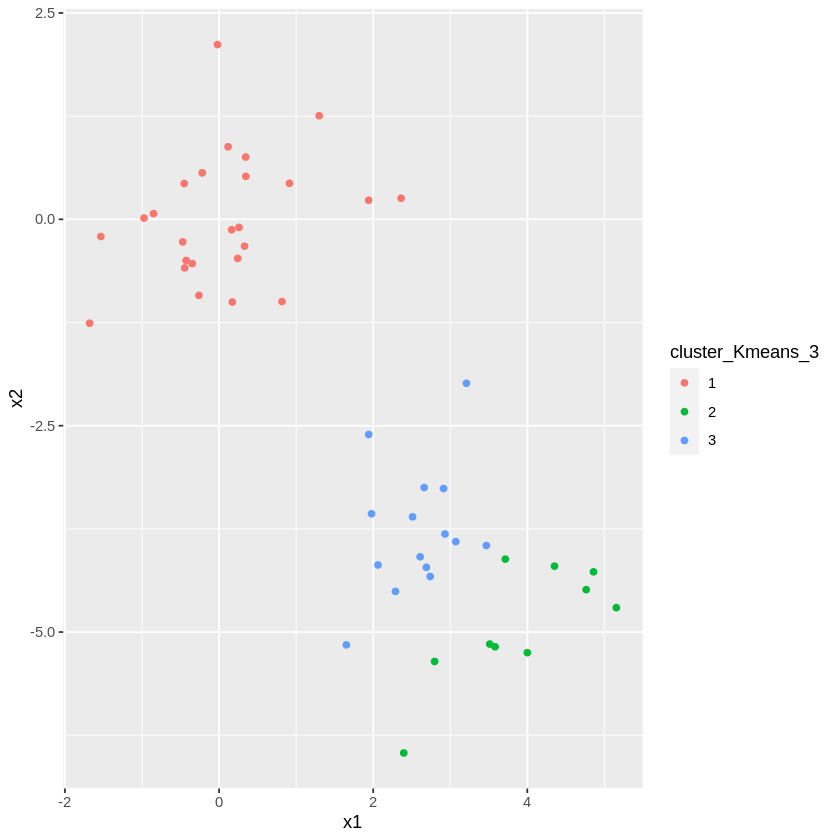

In [9]:
set.seed(4)
km_out <- kmeans(df[,1:2], 3, nstart = 20)

df <- df %>% 
  mutate(cluster_Kmeans_3 = factor(km_out$cluster))

ggplot(data = df) +
  geom_point(mapping = aes(x1, x2, colour = cluster_Kmeans_3))

**Non** esiste, purtroppo, un criterio unico, universalmente riconosciuto, per la scelta di $K$. A titolo di esempio, di seguito vorrei illustrarti la definizione e l'utilizzo del **coefficiente di Silhouette**.

## Silhouette e coefficiente di silhouette

 Denotiamo con
* $C_1,\dots,C_K$  la soluzione ottenuta (per esempio con l'algoritmo $K$-means, ma si può applicare a qualsiasi altro algoritmo)
* $|C_k|$ il numero di osservazioni nel cluster $k$, con $k=1,\ldots,K$.
* $C_{k(i)}$ il cluster a cui appartiene l'osservazione/riga $i$-sima, con $i=1,\ldots,n$.        
* $a(i)$ la distanza (per esempio quella euclidea) *media* tra l'osservazione $i$-esima e tutte le altre nello stesso cluster $C_{k(i)}$
$$
a(i)=\frac{1}{|C_{k(i)} - 1|} \sum_{j \in C_{k(i)},i\neq j} d(i, j)
$$
* $b(i)$ la distanza *media* *minima* tra $i$ e tutte le altre negli altri cluster $C_k$, $k \neq k(i)$
$$
b(i)=\min_{k \neq k(i)} \frac{1}{|C_k|} \sum_{j \in C_k} d(i, j).
$$

Il valore di *silhouette* $s(i)$ per ogni osservazione $i$ del data set è definito come
$$
s(i) = \frac{b(i) - a(i)}{\max \lbrace a(i), b(i) \rbrace}
$$

Quando $|C_{k(i)}| = 1$ si pone $s(i)=0$.

Dalla definizione, puoi osservare che $s(i)$ è compreso tra -1 e 1, per ogni $i$.
* Maggiore è la similarità dell'osservazione  $i$  con quelle dello *stesso* cluster, minore è $a(i)$ e quindi maggiore è $s(i)$.
* Maggiore è la similarità dell'osservazione  $i$  con quelle degli *altri* cluster, minore è $b(i)$ e quindi minore è $s(i)$.

Quindi, maggiore è il valore $s(i)$ ottenuto, più è stabile la sua assegnazione al cluster. 
Quindi, in generale, avendo a disposizioni più soluzioni per lo stesso problema di clustering (ottenute per esempio con valori diversi di $K$) puoi associare ad ognuna di esse la *media* $\bar s(K)$ dei valori $s(i)$ ottenuti per ogni osservazione. Puoi quindi preferire tra le diverse soluzioni quella con il più alto $\bar s(K)$, che viene definito *coefficiente di silhouette*. 


### Implementazione coefficiente di silhouette in R/RStudio

Con riferimento all'ultima soluzione ottenuta mediante clustering $K$-means (in cui hai impostato $K=3$) e contenuta nella variabile `km_out`, puoi calcolare il valore di silhouette in corrispondenza di ogni osservazione del data set `df[,1:2]`,  mediante la funzione `silhouette()` del pacchetto `cluster` applicata agli argomenti

* `km_out$cluster`, che contiene il cluster assegnato ad ogni osservazione mediante l'ultimo clustering $K$-means effettuato (con $K=3$).
* `dist = dist(df[,1:2])`, che contiene la matrice delle distanze tra tutte le osservazioni del data set  `df[,1:2]`. Nota che, non specificando nulla, nella funzione `dist()`, per il momento, stai generando una matrice delle distanze basata sulla distanza euclidea.

In [10]:
#library(cluster)
cluster_k <- km_out$cluster
euclid.d.matrix  <- dist(df[,1:2]) #oppure 
#euclid.d.matrix  <- dist(select(df, x1:x2))
sil <- silhouette(cluster_k, dist = euclid.d.matrix) #assegno l'output della funzione silhouette alla variabile sil

Il valore di silhouette, denotato in precedenza con $s(i)$, è contenuto in `sil` (prova a visualizzarne il contenuto).  
Il valore $\bar s(K)$ della soluzione ottenuta mediante clustering $K$-means (con $K=3$) è invece contenuto in 

In [11]:
summary(sil)$avg.width  %>% round(4)

[1] 0.5393

che, come sappiamo, rappresenta la media dei valori di silhouette su tutte le $n$ osservazioni.

Nell'esempio seguente, puoi ripetere la procedura in corrispondenza di più soluzioni ottime ottenute con l'algoritmo $K$-means per diversi $K=2,3,\ldots,10$ e visualizzare  $\bar s(K)$ a diversi $K$.

In [12]:
#crea un vettore con i valori di K che vuoi esplorare
k_vec<- 2:10 
#crea un vettore numerico di zeri della stessa lunghezza di k_vec in cui registreremo i valori di silhouette media per ogni K considerato in k_vec
silhouette_vec <- numeric(length(k_vec)) 
#itera l'istruzione vista nell'esempio precedente
for ( l in 1:length(k_vec)) { #devi far scorrere l'indice l tra 1 e 9
  #applica il k-means per ogni valore di K in k_vec e cerco l'ottimo globale a partire da 100 soluzioni iniziali
  km_out <- kmeans(df[,1:2], centers = k_vec[l], nstart = 100) 
  #calcola il coefficiente di silhouette per la soluzione corrente
  sil <- silhouette(km_out$cluster, dist = dist(df[,1:2])) 
  silhouette_vec[l] <- summary(sil)$avg.width
}

e visualizzare i risultati ottenuti

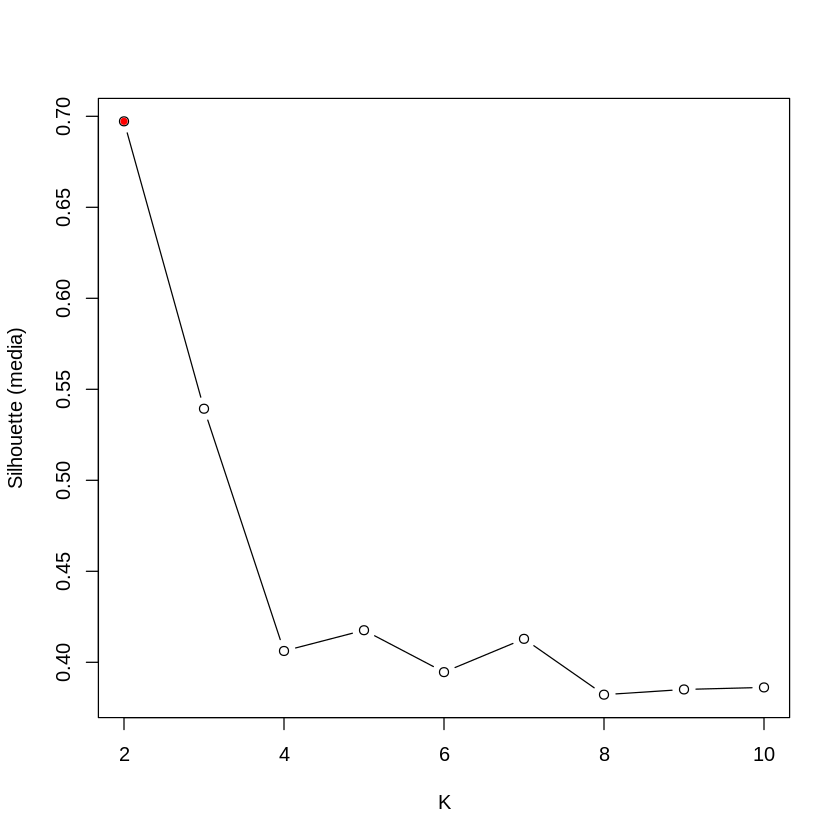

In [13]:
plot(k_vec, silhouette_vec, 
     type = "b",
     xlab = "K",
     ylab = "Silhouette (media)")
points(k_vec[which.max(silhouette_vec)], #evidenzia il massimo con un punto rosso
       max(silhouette_vec), 
       col = "red", 
       pch = 20)

Come ci aspettavamo il coefficiente di silhouette ottiene il massimo in corrispondenza di $K=2$, che, avendo simulato il data set, sappiamo essere il  numero reale di gruppi omogenei. 

Nella prossima unità, ti fornirò una panoramica dei concetti base di un'altra importante tecnica per l'analisi dei gruppi: il clustering gerarchico. Alla fine della quale avrai la possibilità di cimentarti ed applicare su un data set reale, contenente i parametri di un processo di saldatura reale, acquisiti durante prove di laboratorio.